In [1]:
import pandas as pd
import numpy as np

### Book

In [8]:
books = pd.read_csv('books.csv', usecols=['action', 'side', 'price', 'size', 'ts']).set_index('ts')

In [9]:
books.head()

,action,side,price,size
ts,,,,
1762560000005,snapshot,ask,103358.4,0.034000
1762560000005,snapshot,ask,103357.9,0.000201
1762560000005,snapshot,ask,103357.8,0.046614
1762560000005,snapshot,ask,103357.7,0.223404
1762560000005,snapshot,ask,103357.5,0.000010


In [10]:
bbo = books.groupby('ts').apply(lambda g: g.iloc[[49, 50], :])

### BBO

In [11]:
wide = (
    bbo.pivot_table(
        index="ts",
        columns="side",
        values=["price", "size"],
        aggfunc="last"      # latest quote per ts/side if multiple rows
    )
)

# flatten MultiIndex columns -> price_ask, size_ask, price_bid, size_bid
wide.columns = [f"{metric}_{side}" for metric, side in wide.columns]
wide.head()

,price_ask,price_bid,size_ask,size_bid
ts,,,,
1762560000005,103335.4,103335.3,0.872284,0.301910
1762560000105,103335.4,103335.3,0.872284,0.312720
1762560000205,103335.4,103335.3,0.872284,0.312720
1762560000305,103335.4,103335.3,0.851870,0.312720
1762560000405,103335.4,103335.3,0.936217,0.312678


<Axes: xlabel='ts'>

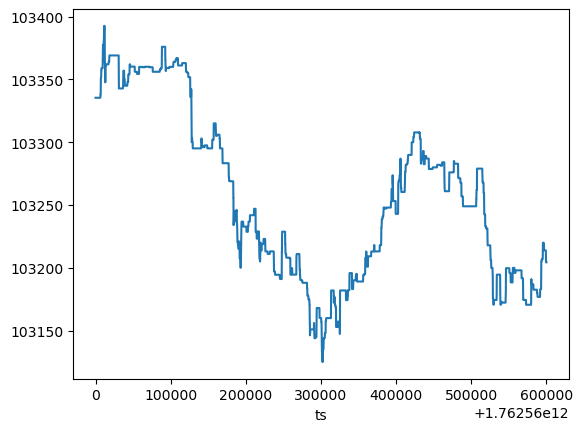

In [14]:
mid = ((wide.price_ask + wide.price_bid)/2)
mid.plot()

In [13]:
norm = wide.size_ask + wide.size_bid
ar = wide.size_ask / norm
br = wide.size_bid / norm

In [17]:
wmid = (wide.price_ask * ar + wide.price_bid * br)

<Axes: xlabel='ts'>

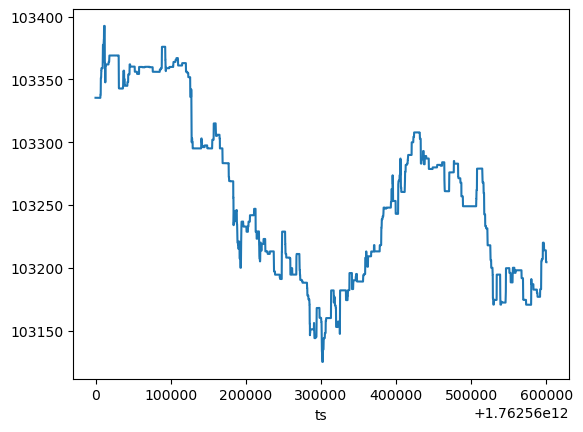

In [18]:
wmid.plot()

In [19]:
r = (mid.shift(-1)-mid)/mid

<Axes: xlabel='ts'>

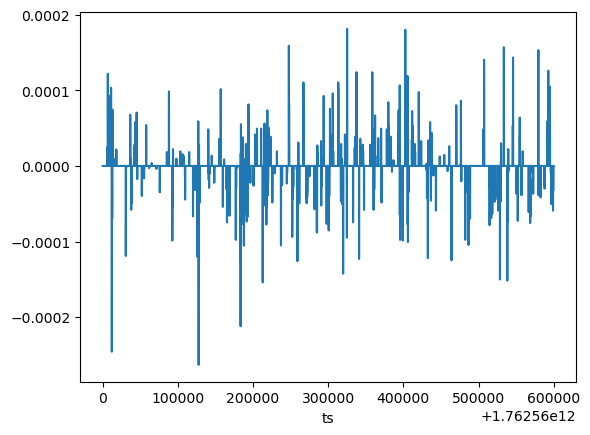

In [20]:
r.plot()